In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from math import factorial
from decimal import Decimal, getcontext
from functools import lru_cache
from scipy.integrate import quad


ЗАДАЧА 1

In [2]:

getcontext().prec = 100

def calc_integrand(x):
    x_float = float(x) # Convert Decimal to float for np.isclose
    if np.isclose(x_float, 0.0):
        return Decimal('0.5')
    return Decimal(np.sin(x_float / 2)) / Decimal(np.exp(x_float) - 1)

def adaptive_integration(a, b, tol):
    result, error = quad(lambda x: float(calc_integrand(x)), a, b, epsabs=tol)
    return result, error

def simpson_method(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n должно быть четным")
    h = (b - a) / n
    x_vals = np.linspace(a, b, n + 1)
    y_vals = [f(xi) for xi in x_vals]
    return h/3 * (float(y_vals[0]) + 2*np.sum([float(yi) for yi in y_vals[2:-1:2]]) + 4*np.sum([float(yi) for yi in y_vals[1::2]]) + float(y_vals[-1]))

def integrate_simpson(a,b,n):
    return simpson_method(calc_integrand,a,b,n)


def diff_scheme_integration(f, a, b, num_intervals, order):

    def calc_factorial(n):
        if n == 0:
            return Decimal(1)
        else:
            return Decimal(n) * calc_factorial(n-1)

    def calc_combinations(n, k):
        if k < 0 or k > n:
            return Decimal(0)
        return calc_factorial(n) // (calc_factorial(k) * calc_factorial(n - k))

    def calc_D(n, j):
        if j == 0:
            return Decimal(1)
        s = Decimal(0)
        for k in range(n + 2 * j + 1):
          for l in range(j+1):
            s+= (Decimal((-1)**k) * D_values[l]
                  * calc_combinations(n + 2*l, k-(j-l))
                  * Decimal(n + 2*j - 2*k)**(n + 2*j+2)
                  / (Decimal(2)**(n+2*j+2) * calc_factorial(n + 2*j + 2))
                )
        return s

    D_values = [Decimal(1)]
    for j in range(1, order+2):
        D_values.append(calc_D(order,j-1))


    def calc_A(k, n, m):
        s = Decimal(0)
        for l in range(m + 1):
            s += Decimal((-1)**(k - m)) * D_values[l] * calc_combinations(n + 2*l, k - m + l)
        return s

    def calc_W(m):
        result = []
        for k in range(2 * m + 1):
            s = Decimal(0)
            for n in range(m + 1):
                a_val = calc_A(k, 2*n, m - n)
                denom = Decimal(2)**(2*n) * calc_factorial(2*n + 1)
                s += a_val / denom
            result.append(s)
        return result

    h = Decimal(b - a) / Decimal(num_intervals)
    W_coeffs = calc_W(order)
    total_sum = Decimal(0)

    for j in range(num_intervals):
        local_sum = Decimal(0)
        for k in range(-order, order + 1):
            x_val = Decimal(a) + (Decimal(j + k) + Decimal('0.5')) * h
            local_sum += W_coeffs[order - k] * calc_integrand(x_val)
        total_sum += local_sum
    return float(h * total_sum)



a = -1
b = 1
tolerance = np.finfo(float).eps

result_adaptive, error_adaptive = adaptive_integration(a, b, tolerance)
print(f"Адаптивный метод: {result_adaptive:.16f}, Ошибка: {error_adaptive:.16e}")

n_simpson = 100000
result_simpson = integrate_simpson(a, b, n_simpson)
print(f"Метод Симпсона:    {result_simpson:.16f}")

for order in [3, 4, 5, 6, 7]:
    print(f"--- m={order} ---")
    for num_intervals in [2, 4, 8, 16]:
        diff_approx = diff_scheme_integration(calc_integrand, a, b, num_intervals, order)
        print(f" J={num_intervals} | DiffScheme={diff_approx:.16f}")
    print()

Адаптивный метод: 1.0130392362326259, Ошибка: 1.1246994849141444e-14
Метод Симпсона:    1.0130392362326262
--- m=3 ---
 J=2 | DiffScheme=0.9349397633176184
 J=4 | DiffScheme=0.9956633152338227
 J=8 | DiffScheme=1.0088255753044062
 J=16 | DiffScheme=1.0119938409861708

--- m=4 ---
 J=2 | DiffScheme=0.9309740619776089
 J=4 | DiffScheme=0.9954539171366847
 J=8 | DiffScheme=1.0088129102600041
 J=16 | DiffScheme=1.0119930547083573

--- m=5 ---
 J=2 | DiffScheme=0.9272353421671441
 J=4 | DiffScheme=0.9952543616162053
 J=8 | DiffScheme=1.0088008378272852
 J=16 | DiffScheme=1.0119923060344986

--- m=6 ---
 J=2 | DiffScheme=0.9235962608665852
 J=4 | DiffScheme=0.9950633968616418
 J=8 | DiffScheme=1.0087893531495173
 J=16 | DiffScheme=1.0119915949743612

--- m=7 ---
 J=2 | DiffScheme=0.9200305086711033
 J=4 | DiffScheme=0.9948810367775285
 J=8 | DiffScheme=1.0087784586252504
 J=16 | DiffScheme=1.0119909215691512



ЗАДАЧА 3

In [3]:
import numpy as np

def f(x):
    return (x * x + 1) * np.cos(2 * x) / (x**4 + x * x + 1)

def g(x):
    return np.cos(2 * x) / (x * x)

g_sum = np.pi**2/6 - np.pi+1

def kummer(f, g, i=1, k=10):
    s = 0
    for j in range(i, k + 1):
        s += f(j) - g(j)
    return s + g_sum

for k in np.array([1, 10, 100, 1000, 10000]):
    res = kummer(f, g, 1, k)
    print(f"Sum, k = {k}: {res}")

Sum, k = 1: -0.3579429745591859
Sum, k = 10: -0.35126576395052383
Sum, k = 100: -0.35126538587918177
Sum, k = 1000: -0.35126538587922834
Sum, k = 10000: -0.35126538587922834


ЗАДАЧА 4

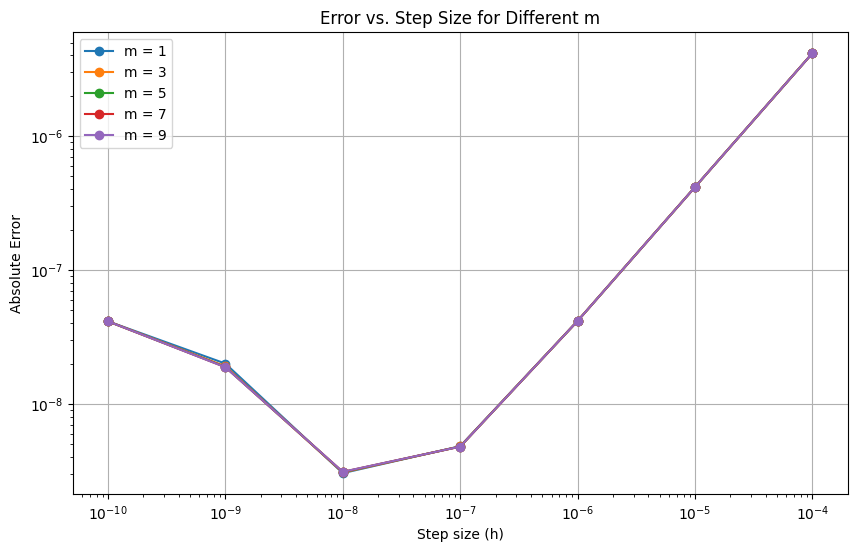

In [4]:
getcontext().prec = 100

@lru_cache(None)
def fact(n: int) -> Decimal:
    if n < 0:
        raise ValueError("Negative factorial not defined")
    if n == 0 or n == 1:
        return Decimal(1)
    return Decimal(n) * fact(n - 1)

@lru_cache(None)
def comb(n: int, k: int) -> Decimal:
    if k < 0 or k > n:
        return Decimal(0)
    return fact(n) / (fact(k) * fact(n - k))

@lru_cache(None)
def D(n: int, j: int) -> Decimal:
    if j == 0:
        return Decimal(1)
    _ = D(n, j-1)
    return _compute_D(n, j)[j]

@lru_cache(None)
def _compute_D(n: int, J: int):
    results = [Decimal(0)]*(J+1)
    results[0] = Decimal(1)
    for j in range(J):
        s = Decimal(0)
        for k in range(n + 2*j + 1):
            for l in range(j+1):
                val = (
                    Decimal((-1)**k)
                    * results[l]
                    * comb(n+2*l, k - (j - l))
                    * Decimal((n + 2*j - 2*k)**(n + 2*j + 2))
                    / (Decimal(2)**(n + 2*j + 2) * fact(n + 2*j + 2))
                )
                s += val
        results[j+1] = s
    return results

@lru_cache(None)
def A(k: int, n: int, m: int) -> Decimal:
    s = Decimal(0)
    sign = Decimal((-1)**(k - m))
    for l in range(m+1):
        s += (
            sign
            * D(n, l)
            * comb(n+2*l, k - m + l)
        )
    return s

def y(x: float) -> float:
    if x > 0:
        return np.cosh(np.sqrt(np.abs(x)))
    elif x < 0:
        return np.cos(np.sqrt(np.abs(x)))
    else:
        return 1.0

def f(t: float) -> float:
    if t==0:
        return 0
    return ((y(t) - 1.0) / t)

def r(n: int) -> int:
    return (n % 2)

def limit(m: int, h: float, f_val) -> float:
    N = 2*m + 1
    j_min = - (2*m + 1)
    j_max = + (2*m + 1)
    size_y = j_max - j_min + 1
    offset = - j_min

    y_arr = [0.0]*size_y
    for j in range(j_min, j_max+1):
        arg = (2*j - 1)*(h/2.0)
        y_arr[j + offset] = f_val(arg)

    S = 0.0
    for n_ in range(N+1):
        rr = r(n_)
        alpha = m - (n_ - rr)/2.0
        alpha_int = int(alpha)

        sign = (-1)**n_
        denom = (4**n_) * float(factorial(n_))
        factor_n = sign / denom

        max_k = 2*m + rr
        for k_ in range(max_k+1):
            j_idx = (2*m + rr) - 2*k_
            y_val = y_arr[j_idx + offset]
            A_val = float(A(k_, n_, alpha_int))
            S += A_val * factor_n * y_val

    return S


def f_scheme(t):
    return f(t)

m_arr = np.array([1+2*j for j in range(5)])


results = {}  
for m in m_arr:
    results[m] = {"h_values": [], "errors": []}
    for p in range(4, 11):
        h = 10**(-p)
        val = limit(m, h, f_scheme)
        error = np.abs(val - 0.5) 
        results[m]["h_values"].append(h)
        results[m]["errors"].append(error)


plt.figure(figsize=(10, 6))
for m in m_arr:
    plt.loglog(results[m]["h_values"], results[m]["errors"], marker='o', label=f'm = {m}')
plt.xlabel("Step size (h)")
plt.ylabel("Absolute Error")
plt.title("Error vs. Step Size for Different m")
plt.grid(True)
plt.legend()
plt.show()
